This notebook is part of the Metaheuristics class, written by Plobner Guillaume, Puydebois Etienne and Savigneux Melchior<br>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Shuffled Frog Leaping Algorithm</div>

<br>

1. [Shuffled Frog Leaping Algorithm](#sec1)
2. [Application in solving 01 knapsack problem](#sec2)

## 1. <a id="sec1"></a> Shuffled Leap Frog Algorithm

The Shuffled Frog Leaping method is based on observing, imitating and modelling the behaviour of a group of frogs when searching for a specific location.

<img src="SFA.png" width="600px">


The population consists of a set of frogs (solutions), **partitioned into subsets, called memeplexes**. The different memeplexes are performing a **local search**. Within each memeplex, a frog can be influenced by the others, and evolve through a process of memetic evolution. Then, frogs are passed among memeplexes in a **shuffling process**. The local search and the shuffling processes continue until a **convergence criteria** is satisfied.
<br><br>

To get into details, an **initial population of frogs is created randomly**. A frog i (a solution) is represented as :<br> 

$$X_{i} =(x_{i,1}, x_{i,2}, ..., x_{i,j})$$ 

Afterwards, the frogs are **sorted in a descending order** according to their fitness. Then, the population is divided into m memeplexes, each containing n frogs. As described by the drawing, the first frog goes to the first memeplex, the second frog goes to the second memeplex, frog n goes to the $m^{th}$ memeplex, and frog n+1 goes back to the first memeplex, and so on.

<img src="memplex.png" width="500px">

Within each memeplex, the frogs with the best and the worst fitnesses are identified as $X_{b}$ and $X_{w}$ , respectively. Also, the frog with the global best fitness is identified as $X_{g}$. Then, a process is applied to improve only the frog with the worst fitness (not all frogs) in each cycle. Accordingly, the position of the frog with the worst fitness is adjusted as follows:

$$D_{i} = Rand()\times(X_{b}-X_{w}),$$

where $D_{i}$ is the change in the $i^{th}$ frog position and new position is given by: 

$$X_{w}(new) = X_{w} + D_{i}\\
-D_{max} <= D_{i} <= D_{max},$$

where $Rand()$ is a random number between 0 and 1; $D_{max}$ is the maximum allowed change in a frog position. If this process produces a better solution, it replaces the worst frog. Otherwise, calculations above are repeated but with respect to the global best frog (i.e. $X_{g}$ replaces $X_{b}$). If no improvement possible in this case, then a new solution is randomly generated to replace that frog. The calculations then continue for a specific number of iterations.

The pseudocode for the Shuffled Frog Leaping Algorithm (discrete) is given below.



<pre><code>
<div class="alert alert-warning">
**Pseudocode for Shuffled Frog Leaping Algorithm** 


Generate random population of solutions (frogs)
**for** each individual i in population **do**: 
    calculate fitness(i) 
**end for**
Sort the population P in descending order of their fitness 
Divide P into m memeplexes
**for** each memeplex **do**
    Determine the best and worst frogs
    Improve the worst frog position
    Repeat for a specific number of iterations
**end for**
Combine the evolved memeplexes
Sort the population P in descending order of their fitness
**if** criteria is satisfied **then**
    Return best solution
**end if**
</div>
</pre></code>


<img src="algo_shuffled.png" width="400px">

<table><tr><td>***Fig. 1 Flowchart Shuffled Frog Leaping Algorithm*** </td></tr></table>




<div class="alert alert-success">
Process of Shuffled frog Leaping.
<ul>
<li> Population consists in a set of frogs (solutions)
<li> Partioned into subsets referred as memeplexes
<li> Each memplex are performing a local search
<li> The local search and the suffling processes continue until defined criteria is satisfied 
</ul>
</div>

# 2. <a id="sec2"></a>Application in solving 01 knapsack problem



In [1]:
import numpy as np
from matplotlib import pyplot as plt

**Datasets**

In [2]:
#f1 : dimension 10 : nb bag = 2**10 = 1024
w_f1 = [95, 4, 60, 32, 23, 72, 80, 62, 65, 46] 
p_f1 = [55, 10, 47, 5, 4, 50, 8, 61, 85, 87]
b_f1 = 269.

#f2 : dimension 20 : nb bag = 2**20 = 1048576
w_f2 = [92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]
p_f2 = [44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
b_f2 = 878.

#f3 : dimension 4 : nb bag = 2**4 = 16
w_f3 = [6, 5, 9, 7]
p_f3 = [9, 11, 13, 15]
b_f3 = 20.

#f4 : dimension 4 : nb bag = 2**4 = 16
w_f4 = [2, 4, 6, 7]
p_f4 = [6, 10, 12, 13]
b_f4 = 11.

#f5 : dimension 15 : nb bag = 2**15 = 32768
w_f5 = [56.358531, 80.87405, 47.987304, 89.59624, 74.660482, 85.894345, 51.353496, 1.498459, 36.445204, 16.589862, 44.569231, 0.466933, 37.788018, 57.118442, 60.716575]
p_f5 = [0.125126, 19.330424, 58.500931, 35.029145, 82.284005, 17.41081, 71.050142, 30.399487, 9.140294, 14.731285, 98.852504, 11.908322, 0.89114, 53.166295, 60.176397]
b_f5 = 375.


#f6 : dimension 10 : nb bag = 2**10 = 1024
w_f6 = [30, 25, 20, 18, 17, 11, 5, 2, 1, 1]
p_f6 = [20, 18, 17, 15, 15, 10, 5, 3, 1, 1]
b_f6 = 60.

#f7 : dimension 7 : nb bag = 2**7 = 128
w_f7 = [31, 10, 20, 19, 4, 3, 6]
p_f7 = [70, 20, 39, 37, 7, 5, 10]
b_f7 = 50.

#f8 : dimension 23 : nb bag = 2**23 = 8388608
w_f8 = [983, 982, 981, 980, 979, 978, 488, 976, 972, 486, 486, 972, 972, 485, 485, 969, 966, 483, 964, 963, 961, 958, 959]
p_f8 = [81,980, 979, 978, 977, 976, 487, 974, 970, 485, 485, 970, 970, 484, 484, 976, 974, 482, 962, 961, 959, 958, 857]
b_f8 = 10000.

#f9 : dimension 5 : nb bag = 2**5 = 32
w_f9 = [15, 20, 17, 8, 31]
p_f9 = [33, 24, 36, 37, 12]
b_f9 = 80.

#f10 : dimension 20 : nb bag 2**20 = 1048576
w_f10 = [84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92]
p_f10 = [91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44]
b_f10 = 879.

**Solutions**

In [3]:
#f1 : solution : 
sol_f1 = ([0,1,1,1,0,0,0,1,1,1], 295) 

#f2 : solution : 
sol_f2 = ([1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1], 1024)

#f3 : solution : 
sol_f3 = ([1,1,0,1], 35)
#f4 : solution : 
sol_f4 = ([0,1,0,1], 23)

#f5 : solution : 
sol_f5 = ([0,0,1,0,1,0,1,1,0,1,1,1,0,1,1], 481.0694)

#f6 : solution : 
sol_f6 = ([0,0,1,0,1,1,1,1,1,1], 52)

#f7 : solution : 
sol_f7 = ([1,0,0,1,0,0,0], 107)

#f8 : solution : 
sol_f8 = ([1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0], 9767)

#f9 : solution : 
sol_f9 = ([1,1,1,1,0], 130)

#f10: solution : 
sol_f10 = ([1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1], 1025)

**Choix du problème et définition des paramètres**

In [4]:
################### You only have to touch this cell variables to change the setting
#### MAIN CELL #### When you're ready, just run all the cells
################### Go to the end of the notebook to check results

#choose your problem number here 
num_of_problem = 5

# define all the global problem parameters
weight = globals()['w_f'+str(num_of_problem)]
profit = globals()['p_f'+str(num_of_problem)]
object_number = len(profit)
max_weight = globals()['b_f'+str(num_of_problem)]
solution = globals()['sol_f'+str(num_of_problem)]

####################
# HYPER PARAMETRES #
####################

iteration_limit = 50                       # nombre limite d'iteration globales (critere d'arret)
memeplexe_iterations = 10                  # nombre de 'sous' d'iterations 
bag_number = 200                            # nombre de sacs 
memeplexe_number = 20                       # nombre de sous-ensembles
memeplexe_size = 10                         # taille des sous ensembles
min_random = 0                             # valeur de D minimale ( borne inf loi uniforme)
max_random = 1                             # valeur de D maximale ( borne sup loi uniforme)
pm = 0.1                                   # proba de muter le sac i a chaque iteration
max_mutate_index = bag_number              # doit etre inf ou egal a bag_number (entier)
min_mutate_index = 0 #np.int(bag_number/2) # doit etre entre 0 et max_mutate_number (entier)
nb_object_max = int(object_number/4)       # nombre d'objets mutés sur les bag 'mutants'

**Quelques fonctions...**

In [5]:
#Calcul du poids d'un sac
def weight_of(bag):
    return np.vdot(bag,weight)

#Calcul du profit d'un sac
def profit_of(bag):
    return np.vdot(bag,profit)

#Trier les sacs en fonction de leur profit
def sort_bag(bag_list):
    bag_list.sort(key=lambda x : -x[1])
    return bag_list

#Création d'une liste de sacs
def create_bag_list(bag_number):
    bag_list = []

    for i in range(bag_number):
        bag_weight = max_weight+1
        while bag_weight>max_weight:
            new_bag = np.random.randint(2, size=(1,object_number)).tolist()[0]
            bag_weight = weight_of(new_bag)
        
        #Evaluate profit of the new bag
        bag_profit = profit_of(new_bag)
        bag_list.append((new_bag, bag_profit))
    return sort_bag(bag_list)

In [6]:
#Création d'un dictionnaire - key : memeplex_number, value : memeplexes sorted in descending order by profit -
def create_dict(bag_list,memeplexe_number):
    memeplexe_set = {}
    for i in range(memeplexe_number):
        memeplexe_i = []
        for j in range(memeplexe_size):
            memeplexe_i.append(bag_list[i+j*memeplexe_number])
        sort_bag(memeplexe_i)
        memeplexe_set.update({i : memeplexe_i})
    return memeplexe_set

bag_list = create_bag_list(bag_number)
memeplexe_set = create_dict(bag_list, memeplexe_number) 
memeplexe_set[0]

[([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], 402.10272499999996),
 ([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], 322.986541),
 ([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], 286.623737),
 ([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0], 255.93432399999998),
 ([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], 234.122745),
 ([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], 218.74141699999998),
 ([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], 204.290903),
 ([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], 190.53620899999999),
 ([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], 163.88134399999998),
 ([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0], 127.65892500000001)]

In [7]:
#Améliorer le mauvais sac
def update_object_i(i,best_memeplexe_bag,bad_memeplexe_bag):
    rand = np.random.uniform(min_random,max_random)
    D = np.round(rand*(best_memeplexe_bag[0][i]-bad_memeplexe_bag[0][i]))
    t = D + bad_memeplexe_bag[0][i]
    if t<=0: bad_memeplexe_bag[0][i]= 0
    elif t>0 and t<1: bad_memeplexe_bag[0][i]= np.round(t)
    elif t>=1: bad_memeplexe_bag[0][i]= 1
    
#Mettre à jour le memeplexe en améliorant les mauvais sac
def update_bad_bag(memeplexe):
    best_memeplexe_bag = memeplexe[0]
    bad_memeplexe_bag = memeplexe[-1]
    print('\nbag:', bad_memeplexe_bag)
    bag_w = max_weight+1
    while bag_w>max_weight:
        for i in range(object_number):
            update_object_i(i,best_memeplexe_bag,bad_memeplexe_bag) 
        bag_w = weight_of(bad_memeplexe_bag[0])
    memeplexe[-1] = (bad_memeplexe_bag[0], profit_of(bad_memeplexe_bag[0]))
    print('was replaced by:')
    print('bag:', memeplexe[-1])
    print('\n')
    memeplexe = sort_bag(memeplexe)

In [8]:
def improve_memeplexe(memeplexe,memeplexe_iterations):
    profits_initial=[]
    for bag in memeplexe:
        profits_initial.append(bag[1])
    print('profits:',profits_initial)
    
    for i in range(memeplexe_iterations):
        update_bad_bag(memeplexe)
        memeplexe = sort_bag(memeplexe)
        profit=[]
        
        for bag in memeplexe:
            profit.append(bag[1])
        print('new profits:',profit)

def improve_all_memeplexe(memeplexe_set,memeplexe_iterations):
    for key in range(memeplexe_number):
        print('\n########## MEMEPLEXE '+str(key)+' ##########\n')
        improve_memeplexe(memeplexe_set[key],memeplexe_iterations)

#Mutation avec probabilité
def mutate(bag,pm,nb_object_max):
    if np.random.uniform(0,1)<pm:
        weight_of_bag = max_weight+1
        while weight_of_bag>max_weight:
            for i in range(nb_object_max):
                object_to_mutate = np.random.randint(0,10)
                bag[0][object_to_mutate]=abs(bag[0][object_to_mutate]-1)
            bag = (bag[0], profit_of(bag[0]))
            weight_of_bag = weight_of(bag[0])
    return bag

**Résolution du problème 01 knapsack**

In [9]:
i=0

# plots data initialisation
bad_bag_profit_list = [bag_list[-1][1]]
best_bag_profit_list = [bag_list[0][1]]
bad_bag_weight_list = [weight_of(bag_list[-1][0])]
best_bag_weight_list = [weight_of(bag_list[0][0])]

# main algorithm structure :
while i < iteration_limit:
    
    print('\n#########################################')
    print('#########################################')
    print('########### ITERATION '+str(i)+' #################')
    print('#########################################')
    print('#########################################')
    
    print('\n')
    for bag in bag_list:
        print(bag[1])
    
    # intra groups iterations
    improve_all_memeplexe(memeplexe_set,memeplexe_iterations)
    
    # 'deshuffleing'
    new_bag_list = []
    for j in range(memeplexe_number):
        for bag in memeplexe_set[j]:
            new_bag_list.append(bag)
    
    # resorting new bags 
    bag_list = sort_bag(new_bag_list)
    
    # add data to data lists
    bad_bag_profit_list.append(bag_list[-1][1])
    best_bag_profit_list.append(bag_list[0][1])
    bad_bag_weight_list.append(weight_of(bag_list[-1][0]))
    best_bag_weight_list.append(weight_of(bag_list[0][0]))
    
    # mutate some bags according to hyperparameters settings
    for bag_index in range(min_mutate_index,max_mutate_index):
        bag_list[bag_index] = mutate(bag_list[bag_index],pm,nb_object_max)
    
    # reshuffleing
    memeplexe_set = create_dict(bag_list, memeplexe_number) 
    i+=1


#########################################
#########################################
########### ITERATION 0 #################
#########################################
#########################################


402.10272499999996
383.184301
363.28318
362.303537
355.08896
349.84282899999994
345.14603
345.069735
341.68217999999996
340.284432
339.55809199999993
337.93450699999994
336.484878
334.14410799999996
333.185827
332.981353
332.47169399999996
331.299783
324.52772699999997
323.203222
322.986541
318.872646
314.44440999999995
309.964293
309.845271
304.654073
303.65917
302.70088799999996
302.587969
300.454725
299.401838
299.30723
295.211645
294.50361699999996
294.033632
292.480239
289.907529
289.220862
288.662373
287.856684
286.623737
283.864863
283.654286
281.594288
280.272835
279.384746
276.04907399999996
275.392926
275.36240799999996
273.57097
272.313608
270.778527
264.96169899999995
264.220099
263.32896
262.898648
262.75521100000003
258.000427
257.62505
257.490768
255.93432399999

bag: ([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0], 251.792962)


new profits: [333.185827, 333.185827, 333.185827, 310.293893, 294.033632, 287.49961799999994, 263.32896, 251.792962, 246.272164, 236.432997]

bag: ([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], 236.432997)
was replaced by:
bag: ([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], 248.982208)


new profits: [333.185827, 333.185827, 333.185827, 310.293893, 294.033632, 287.49961799999994, 263.32896, 251.792962, 248.982208, 246.272164]

########## MEMEPLEXE 15 ##########

profits: [332.981353, 292.480239, 262.898648, 236.42384099999998, 221.23172699999998, 206.024353, 192.895291, 177.48954700000002, 137.53471399999998, 67.19565399999999]

bag: ([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0], 67.19565399999999)
was replaced by:
bag: ([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], 120.36194900000001)


new profits: [332.981353, 292.480239, 262.898648, 236.42384099999998, 221.23172699999998, 206.024353, 192.895291, 177.489547000000

bag: ([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], 265.593431)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], 364.74501699999996)


new profits: [395.092623, 395.092623, 395.092623, 383.184301, 364.74501699999996, 345.069735, 337.51640399999997, 324.689473, 310.214545, 287.28293699999995]

bag: ([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], 287.28293699999995)
was replaced by:
bag: ([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], 409.82390799999996)


new profits: [409.82390799999996, 395.092623, 395.092623, 395.092623, 383.184301, 364.74501699999996, 345.069735, 337.51640399999997, 324.689473, 310.214545]

bag: ([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], 310.214545)
was replaced by:
bag: ([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 397.91558599999996)


new profits: [409.82390799999996, 397.91558599999996, 395.092623, 395.092623, 395.092623, 383.184301, 364.74501699999996, 345.069735, 337.51640399999997, 324.689473]

bag: ([0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], 421.784111)


new profits: [423.45957699999997, 423.45957699999997, 421.784111, 395.092623, 378.23724999999996, 375.79576999999995, 363.40830600000004, 352.409435, 345.14297799999997, 341.68217999999996]

bag: ([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], 341.68217999999996)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], 408.72829199999995)


new profits: [423.45957699999997, 423.45957699999997, 421.784111, 408.72829199999995, 395.092623, 378.23724999999996, 375.79576999999995, 363.40830600000004, 352.409435, 345.14297799999997]

########## MEMEPLEXE 10 ##########

profits: [423.45957699999997, 395.092623, 377.03482199999996, 363.40830600000004, 358.064516, 348.55189499999994, 341.273231, 335.593738, 322.165593, 301.916562]

bag: ([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], 301.916562)
was replaced by:
bag: ([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 427.16757599999994)


new profits: 

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], 403.39365799999996)


new profits: [403.39365799999996, 403.39365799999996, 383.184301, 374.90768099999997, 350.29450299999996, 345.069735, 339.55809199999993, 332.47169399999996, 315.952025, 274.849695]

bag: ([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], 274.849695)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 407.83715199999995)


new profits: [407.83715199999995, 403.39365799999996, 403.39365799999996, 383.184301, 374.90768099999997, 350.29450299999996, 345.069735, 339.55809199999993, 332.47169399999996, 315.952025]

bag: ([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], 315.952025)
was replaced by:
bag: ([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], 313.64482499999997)


new profits: [407.83715199999995, 403.39365799999996, 403.39365799999996, 383.184301, 374.90768099999997, 350.29450299999996, 345.069735, 339.55809199999993, 332.47169399999996, 313.64482499999997]

bag: ([0, 0, 0, 0, 0,

bag: ([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 364.888454)


new profits: [435.93859599999996, 435.93859599999996, 427.903073, 421.784111, 397.503586, 385.13748599999997, 376.86697, 368.51100199999996, 367.116305, 364.888454]

bag: ([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 364.888454)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], 435.93859599999996)


new profits: [435.93859599999996, 435.93859599999996, 435.93859599999996, 427.903073, 421.784111, 397.503586, 385.13748599999997, 376.86697, 368.51100199999996, 367.116305]

bag: ([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], 367.116305)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], 435.93859599999996)


new profits: [435.93859599999996, 435.93859599999996, 435.93859599999996, 435.93859599999996, 427.903073, 421.784111, 397.503586, 385.13748599999997, 376.86697, 368.51100199999996]

bag: ([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 368.51100199999996)
was replaced by:
bag: ([

bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], 397.503586)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)


new profits: [450.669881, 450.669881, 435.93859599999996, 433.814508, 432.502212, 428.028199, 423.572496, 420.892971, 420.892971, 408.72829199999995]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], 408.72829199999995)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 407.83715199999995)


new profits: [450.669881, 450.669881, 435.93859599999996, 433.814508, 432.502212, 428.028199, 423.572496, 420.892971, 420.892971, 407.83715199999995]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 407.83715199999995)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)


new profits: [450.669881, 450.669881, 450.669881, 435.93859599999996, 433.814508, 432.502212, 428.028199, 423.572496, 420.892971, 420.892971]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], 420.892971)
was replaced by:
ba

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 466.338083, 450.669881, 435.93859599999996, 432.502212]

bag: ([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 432.502212)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 466.338083, 450.669881, 435.93859599999996, 413.171788]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 466.338083, 450.669881, 435.93859599999996, 413.171788]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], 427.903073)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 466.338083, 450.669881, 435.9385959999

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 469.161046, 469.161046, 466.338083, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 469.161046, 469.161046, 466.338083, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 469.161046, 469.161046, 466.338083, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)




bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 7 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

bag: ([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 368.51100199999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 450.669881]

bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 450.669881]

bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 450.669881]

bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.0

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 398.785363, 332.33436]

bag: ([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], 332.33436)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 410.019226, 398.785363]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 410.019226]

bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.06936

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 15 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 418.115787]

bag: ([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 418.115787)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0,



new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 379.619739, 365.01358]

bag: ([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 365.01358)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 379.619739]

bag: ([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], 379.619739)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

#############


#########################################
#########################################
########### ITERATION 20 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
258.290353
282.97372299999995
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
466.338083
481.069368
414.61836500000004
481.069368
481.069368
481.069368
481.069368
481.069368
398.785363
412.698751
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
368.929105
481.069368
481.069368
481.069368
481.069368
412.698751
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368


was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 


#########################################
#########################################
########### ITERATION 23 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
450.669881
481.069368
481.069368
481.069368
398.785363
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.0


#########################################
#########################################
########### ITERATION 24 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
388.760033
481.069368
481.069368
481.069368
481.069368
377.56279099999995
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
419.083223
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
332.459486
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
410.019226
450.669881
481.069368
481.069368
481.0693


#########################################
#########################################
########### ITERATION 25 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
273.98907399999996
481.069368
481.069368
481.069368
372.985015
481.069368
422.693563
375.31357699999995
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
377.437665
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
327.735221
481.069368
481.069368
309.884945



#########################################
#########################################
########### ITERATION 26 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
375.31357699999995
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
393.19437200000004
418.115787
410.019226
481.069368
297.335734
481.069368
481.069368
481.069368
481.069368
481.069368
311.07516699999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
344.91409
396.768089
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
384.179204
357.695242
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
410.


#########################################
#########################################
########### ITERATION 27 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
330.41474600000004
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
414.61836500000004
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
398.910489
481.069368
481.069368
481.069368
481.069368
481.069368
272.03894099999997
481.069368
481.069368
481.069368
481.069368
481.069368
392.294076
414.61836500000004
481.069368
481.069368
481.069368
419.15952000000004
481.069368
336.78701
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368


#########################################
#########################################
########### ITERATION 28 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
285.683767
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
433.814508
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
325.843073
392.294076
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
374.02874799999995
481.069368
481.069368
481.069368
481.069368
481.069368
359.614856
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
404.428235
481.069368
481.069368
481.069368
304.2634


#########################################
#########################################
########### ITERATION 29 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
385.796686
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
398.785363
357.695242
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
422.56843699999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
269.359416
481.069368
481.069368
481.069368
481.069368
481.069368
481.0693


#########################################
#########################################
########### ITERATION 30 #################
#########################################
#########################################


481.069368
481.069368
371.065401
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
384.179204
481.069368
481.069368
377.52617
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
338.355663
481.069368
481.069368
481.069368
386.54743999999994
481.069368
481.069368
388.68373599999995
481.069368
481.069368
481.069368
481.069368
407.96227799999997
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
316.666158
481.069368
416.19617300000004
481.069368
481.069368
481.069368
481.069368
300.384533
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069


#########################################
#########################################
########### ITERATION 31 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
379.744865
481.069368
481.069368
481.069368
337.00064100000003
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
379.744865
481.069368
481.069368
481.069368
481.069368
379.989013
481.069368
481.069368
330.384228
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
345.146031
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
362.764366
481.069368
481.069368
481.0693


#########################################
#########################################
########### ITERATION 32 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
450.669881
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
398.910489
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
403.41502099999997
309.884945
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.0693

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 408.050783]

bag: ([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 408.050783)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

#########################################
#########################################
########### ITERATION 34 #################
#########################################
#########################################





#########################################
#########################################
########### ITERATION 35 #################
#########################################
#########################################


481.069368
481.069368
481.069368
327.86034700000005
481.069368
481.069368
334.858241
269.23429
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
368.51100199999996
481.069368
422.693563
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
398.785363
481.069368
481.069368
481.069368
481.069368
481.069368
404.428235
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
306.476028
481.069368
481.069368
365.01358
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
48


#########################################
#########################################
########### ITERATION 36 #################
#########################################
#########################################


481.069368
481.069368
387.7163
481.069368
481.069368
466.338083
481.069368
481.069368
481.069368
481.069368
427.16757599999994
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
329.340495
276.543473
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
431.70873099999994
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
48

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)




#########################################
#########################################
########### ITERATION 38 #################
#########################################
#########################################


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
410.019226
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
269.23429
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
278.37458399999997
377.437665
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
422.56843699999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
4

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 16 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.06

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 13 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.06

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

bag: ([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 368.51100199999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.0

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 18 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

481.069368
481.069368
481.069368
368.929105
481.069368
481.069368
481.069368
481.069368
481.069368
392.16895
481.069368
481.069368
481.069368
351.51829499999997
481.069368
481.069368
371.065401
238.959929
481.069368
481.069368
481.069368
481.069368
386.57795899999996
481.069368
371.065401
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
318.002868
481.069368
241.639454
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
377.437665
481.069368
481.069368
481.069368
332.938627
481.069368
481.069368
481.069368
481.069368
408.050783
481.069368
481.069368
481.069368
422.56843699999996
481.069368
481.069368
481.069368
481.069368
450.669881
481.069368
481.069368
422.56843699999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
304.293954
481.069368
481.069368
332.36487900000003
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
375.31357699999995
481.069368
481.069

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 410.019226]

bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## ME

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

In [10]:
print('\nBest bag of each memeplexe after the last iteration:\n')
for h in range(memeplexe_number):
    if h ==0: best_bag = memeplexe_set[h][0]
    print('memeplexe '+str(h)+' :',memeplexe_set[h][0])
    
print('\nBest solution : ',solution)

print('\n')
print('Poids de la meilleure solution trouvée: ', weight_of(best_bag[0]))
print('Poids de la meilleure solution trouvable: ', weight_of(solution[0]))
print('Poids maximal autorisé: ', max_weight)


Best bag of each memeplexe after the last iteration:

memeplexe 0 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 1 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 2 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 3 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 4 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 5 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 6 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 7 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 8 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 9 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 10 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 11 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 12 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,

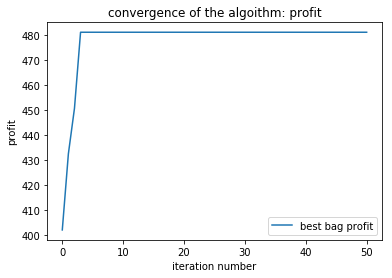

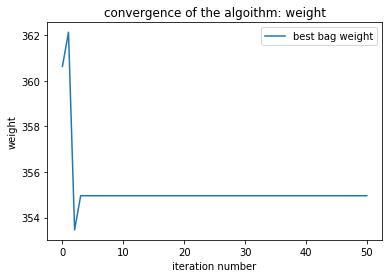

In [11]:
plt.figure()
plt.plot(best_bag_profit_list)
#plt.plot(bad_bag_profit_list)
plt.title('convergence of the algoithm: profit')
plt.xlabel('iteration number')
plt.ylabel('profit')
plt.legend(('best bag profit','worst bag profit'))
plt.show()

plt.figure()
plt.plot(best_bag_weight_list)
#plt.plot(bad_bag_weight_list)
plt.title('convergence of the algoithm: weight')
plt.xlabel('iteration number')
plt.ylabel('weight')
plt.legend(('best bag weight','worst bag weight'))
plt.show()

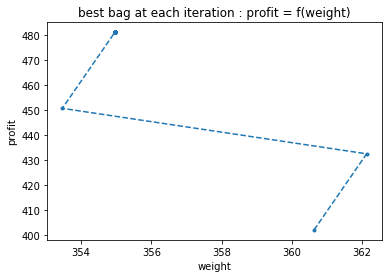

In [12]:
plt.figure()
plt.plot(best_bag_weight_list,best_bag_profit_list,'.--')
plt.xlabel('weight')
plt.ylabel('profit')
plt.title('best bag at each iteration : profit = f(weight)')
plt.show()